In [1]:
import pandas as pd
import numpy  as np

In [2]:
!wget -N https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

--2021-01-09 11:47:17--  https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv
Resolving data.rivm.nl (data.rivm.nl)... 131.224.250.75, 2001:610:430:ffff::16:198
Connecting to data.rivm.nl (data.rivm.nl)|131.224.250.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76029324 (73M) [text/csv]
Saving to: ‘COVID-19_casus_landelijk.csv’

COVID-19_casus_land 100%[===================>]  72.51M  9.88MB/s    in 7.2s    

2021-01-09 11:47:25 (10.1 MB/s) - ‘COVID-19_casus_landelijk.csv’ saved [76029324/76029324]



In [3]:
df_case = pd.read_csv(
    'COVID-19_casus_landelijk.csv',
    sep=';',
    parse_dates=[0, 1],
    infer_datetime_format=True)

df_case.tail(10)

Date_file Date_statistics Date_statistics_type Agegroup  \
858904 2021-01-08 10:00:00      2021-01-08                  DON    60-69   
858905 2021-01-08 10:00:00      2021-01-08                  DPL    60-69   
858906 2021-01-08 10:00:00      2021-01-08                  DPL    70-79   
858907 2021-01-08 10:00:00      2021-01-08                  DPL    60-69   
858908 2021-01-08 10:00:00      2021-01-08                  DON    20-29   
858909 2021-01-08 10:00:00      2021-01-08                  DPL    60-69   
858910 2021-01-08 10:00:00      2021-01-08                  DON    50-59   
858911 2021-01-08 10:00:00      2021-01-08                  DON    10-19   
858912 2021-01-08 10:00:00      2021-01-08                  DON    50-59   
858913 2021-01-08 10:00:00      2021-01-08                  DON    60-69   

           Sex       Province Hospital_admission Deceased  Week_of_death  \
858904  Female   Zuid-Holland            Unknown  Unknown            NaN   
858905  Female  Noord-Brabant            Unknown  Unknown            NaN   
858906  Female   Zuid-Holland            Unknown  Unknown            NaN   
858907    Male   Zuid-Holland            Unknown  Unknown            NaN   
858908  Female     Gelderland            Unknown  Unknown            NaN   
858909    Male  Noord-Brabant            Unknown  Unknown            NaN   
858910  Female   Zuid-Holland            Unknown  Unknown            NaN   
858911    Male   Zuid-Holland            Unknown  Unknown            NaN   
858912  Female   Zuid-Holland            Unknown  Unknown            NaN   
858913  Female  Noord-Holland            Unknown  Unknown            NaN   

             Municipal_health_service  
858904         GGD Rotterdam-Rijnmond  
858905          GGD Hart voor Brabant  
858906            GGD Hollands-Midden  
858907            GGD Hollands-Midden  
858908  GGD Noord- en Oost-Gelderland  
858909          GGD Hart voor Brabant  
858910         GGD Rotterdam-Rijnmond  
858911                 GGD Haaglanden  
858912         GGD Rotterdam-Rijnmond  
858913       GGD Zaanstreek/Waterland

In [4]:
# Define period labels
df_case['period'] = df_case['Date_statistics'].dt.year * 100 + df_case['Date_statistics'].dt.week
df_case['period'] = df_case['period'].apply(str)
df_case['period'] = df_case['period'].apply(lambda x: x[:4] + ' wk ' + x[4:])

#df_case['period'] = (pd.to_datetime('20191230') + pd.to_timedelta((df_case['Date_statistics'].dt.week - 1) * 7, unit='days')).dt.date

# Define group labels
df_case['groups'] = df_case['Sex'] + ' ' + df_case['Agegroup']

df_case.tail(10)

Date_file Date_statistics Date_statistics_type Agegroup  \
858904 2021-01-08 10:00:00      2021-01-08                  DON    60-69   
858905 2021-01-08 10:00:00      2021-01-08                  DPL    60-69   
858906 2021-01-08 10:00:00      2021-01-08                  DPL    70-79   
858907 2021-01-08 10:00:00      2021-01-08                  DPL    60-69   
858908 2021-01-08 10:00:00      2021-01-08                  DON    20-29   
858909 2021-01-08 10:00:00      2021-01-08                  DPL    60-69   
858910 2021-01-08 10:00:00      2021-01-08                  DON    50-59   
858911 2021-01-08 10:00:00      2021-01-08                  DON    10-19   
858912 2021-01-08 10:00:00      2021-01-08                  DON    50-59   
858913 2021-01-08 10:00:00      2021-01-08                  DON    60-69   

           Sex       Province Hospital_admission Deceased  Week_of_death  \
858904  Female   Zuid-Holland            Unknown  Unknown            NaN   
858905  Female  Noord-Brabant            Unknown  Unknown            NaN   
858906  Female   Zuid-Holland            Unknown  Unknown            NaN   
858907    Male   Zuid-Holland            Unknown  Unknown            NaN   
858908  Female     Gelderland            Unknown  Unknown            NaN   
858909    Male  Noord-Brabant            Unknown  Unknown            NaN   
858910  Female   Zuid-Holland            Unknown  Unknown            NaN   
858911    Male   Zuid-Holland            Unknown  Unknown            NaN   
858912  Female   Zuid-Holland            Unknown  Unknown            NaN   
858913  Female  Noord-Holland            Unknown  Unknown            NaN   

             Municipal_health_service      period        groups  
858904         GGD Rotterdam-Rijnmond  2021 wk 01  Female 60-69  
858905          GGD Hart voor Brabant  2021 wk 01  Female 60-69  
858906            GGD Hollands-Midden  2021 wk 01  Female 70-79  
858907            GGD Hollands-Midden  2021 wk 01    Male 60-69  
858908  GGD Noord- en Oost-Gelderland  2021 wk 01  Female 20-29  
858909          GGD Hart voor Brabant  2021 wk 01    Male 60-69  
858910         GGD Rotterdam-Rijnmond  2021 wk 01  Female 50-59  
858911                 GGD Haaglanden  2021 wk 01    Male 10-19  
858912         GGD Rotterdam-Rijnmond  2021 wk 01  Female 50-59  
858913       GGD Zaanstreek/Waterland  2021 wk 01  Female 60-69

In [5]:
# Pivot to period rows with group columns
df_heat = df_case[df_case['Municipal_health_service'] != ''].pivot_table(
    index='period',
    columns='groups',
    values='Date_statistics',
    aggfunc='count').fillna(0)

# Select columns to use, optionally subset or use relative numbers
#df_heat['total'] = df_heat[df_heat.columns[0:24]].sum(axis=1)
df_heat = df_heat[df_heat.columns[0:24]]#.loc['2020 wk 26':]#.div(df_heat['total'], axis='index')

# Use this for relative growth numbers
#df_heat = df_heat / df_heat.shift()

df_heat.tail(5)

groups      Female 0-9  Female 10-19  Female 20-29  Female 30-39  \
period                                                             
2020 wk 51       554.0        5881.0        6332.0        5620.0   
2020 wk 52       496.0        3872.0        5197.0        4446.0   
2020 wk 53       228.0        1770.0        2800.0        2165.0   
2021 wk 01       114.0        1111.0        1684.0        1015.0   
2021 wk 53       133.0        1179.0        1886.0        1287.0   

groups      Female 40-49  Female 50-59  Female 60-69  Female 70-79  \
period                                                               
2020 wk 51        6832.0        7121.0        4054.0        2478.0   
2020 wk 52        5184.0        5697.0        3333.0        2146.0   
2020 wk 53        2356.0        2920.0        1727.0        1291.0   
2021 wk 01        1105.0        1365.0         746.0         568.0   
2021 wk 53        1412.0        1625.0         931.0         535.0   

groups      Female 80-89  Female 90+  ...  Male 20-29  Male 30-39  Male 40-49  \
period                                ...                                       
2020 wk 51        1839.0       784.0  ...      5533.0      4666.0      5625.0   
2020 wk 52        1780.0       687.0  ...      4434.0      3698.0      4166.0   
2020 wk 53         956.0       389.0  ...      2368.0      1889.0      1895.0   
2021 wk 01         558.0       259.0  ...      1660.0      1013.0       929.0   
2021 wk 53         428.0       188.0  ...      1766.0      1099.0      1143.0   

groups      Male 50-59  Male 60-69  Male 70-79  Male 80-89  Male 90+  \
period                                                                 
2020 wk 51      6663.0      4102.0      2451.0      1235.0     276.0   
2020 wk 52      5315.0      3476.0      2108.0      1111.0     254.0   
2020 wk 53      2578.0      1800.0      1142.0       581.0     152.0   
2021 wk 01      1216.0       756.0       497.0       363.0      88.0   
2021 wk 53      1396.0       953.0       545.0       303.0      63.0   

groups      Male <50  Male Unknown  
period                              
2020 wk 51       3.0           0.0  
2020 wk 52       1.0           0.0  
2020 wk 53       0.0           0.0  
2021 wk 01       0.0           0.0  
2021 wk 53       1.0           0.0  

[5 rows x 24 columns]

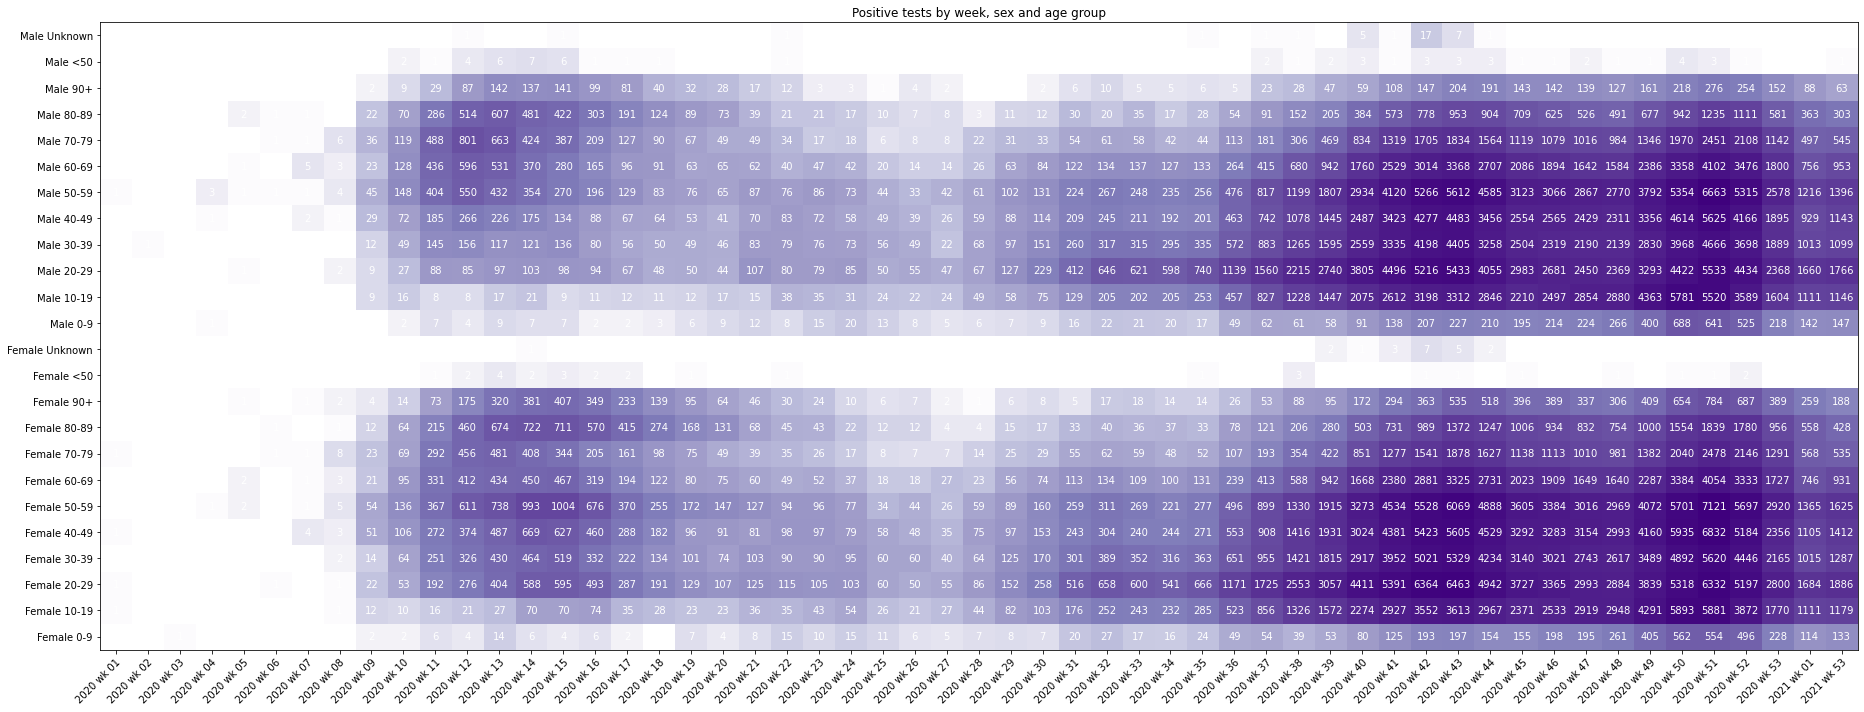

In [6]:
import matplotlib.pyplot as plt

# Define arrays of row and column headers
periods   = df_heat.index
agegroups = df_heat.columns

# Output size may have to be adjusted to data length eventually
fig, ax = plt.subplots(figsize=(26, 10))

# Heatmap on transposed data, X-axis inverted
heatmap = plt.imshow(
    np.log(df_heat[df_heat > 0].loc[:].transpose()),
    cmap='Purples',
    interpolation='nearest',
    aspect='auto',
    origin='lower')

# Every value is an axis tick
ax.set_xticks(np.arange(len(periods)))
ax.set_yticks(np.arange(len(agegroups)))

ax.set_xticklabels(periods)
ax.set_yticklabels(agegroups)

# X labels diagonally
plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha="right",
    rotation_mode="anchor")

# Convert dataframe to numpy format
np_heat = df_heat.to_numpy()

# Set numbers as text labels
for i in range(len(periods)):
    for j in range(len(agegroups)):
        text = ax.text(
            i,
            j,
            int(np_heat[i, j]),
            ha="center",
            va="center",
            color="w")

ax.set_title("Positive tests by week, sex and age group")
fig.tight_layout()
plt.show()